# Проверка гипотез для увеличения выручки

### Краткое описание проекта

В данном исследовании проверим список гипотез для увеличения выручки, подготовленных ранее совместно с отделом маркетинга.
Приоритизируем гипотезы, проведём A/B тест и проанализируем результаты.

В файле hypothesis.csv представлены 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Приоритизация гипотез

In [2]:
#подключаем библиотеки
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [3]:
#настроим вывод
pd.options.display.float_format = '{:,.6f}'.format #округление до 6 знаков при выводе!
pd.set_option('display.max_columns', None)

#отключим предупреждения
#import warnings
#warnings.filterwarnings('ignore')

In [5]:
#загружаем данные
hypothesis = pd.read_csv('C:/Users/Aleks/practicum/datasets/hypothesis.csv')

In [6]:
#ознакомимся с данными hypothesis
pd.set_option('max_colwidth', 120)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
#приведём названия столбцов к змеиному регистру 
hypothesis = hypothesis.rename(
    columns={'Hypothesis':'hypothesis',
        'Reach':'reach',
        'Impact':'impact',
        'Confidence':'confidence',
        'Efforts':'efforts'}
)

**Применим фреймворк ICE для приоритизации гипотез. Отсортируем по убыванию приоритета.** 

In [8]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Применим фреймворк RICE для приоритизации гипотез. Отсортируем по убыванию приоритета.** 

In [9]:
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'])/hypothesis['efforts']
hypothesis[['hypothesis','RICE','ICE']].sort_values(by='RICE', ascending=False)


,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.125000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.000000


**Вывод:** В случае использования ICE самые преспективные 8,0,7,6, в случае использования RICE 7,2,0,6. 

При использовании для приоритизации RICE учитывается не только сила гипотез, но и их охват, поэтому произошло смещение приоритетов, например 8 гипотеза с переместилась с 1 на 5 место, т.к. охватывает исключительно пользователей, у которых день рождения.

Нам требуется увеличить выручку.
*Выручка = Средний чек покупки x Число привлечённых пользователей x Конверсия из пользователя в заказ.*
Нам важны охват пользователей, средний чек и конверсия.

Поэтому по результатам приоритизации стоит рассмотреть гипотезы 7, 2, 0, 6. 
У 8 гипотезы малый охват, поэтому её рассматривать не будем.

### Анализ результатов A/B теста

В результате проведения A/B теста мы получили результаты, которые описаны в файлах orders.csv и visitors.csv.

#### Подготовка данных для анализа

In [11]:
#загрузим данные и ознакомимся с файлами
orders = pd.read_csv('C:/Users/Aleks/practicum/datasets/orders.csv')
visitors = pd.read_csv('C:/Users/Aleks/practicum/datasets/visitors.csv')
print(orders.info())
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [12]:
print(visitors.info())
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
#приведём названия столбцов к змеиному регистру 
orders = orders.rename(
    columns={'transactionId':'transaction_id',
        'visitorId':'visitor_id'}
)
#приведёт тип данных в столбцах date
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

#проверим пропуски в данных
temp = ['visitors','orders']
for i, frame in enumerate([visitors,orders]):
    print('Пропуски в данных в датафрейме', temp[i])
    print(frame.isna().sum())
    print('Всего строк в датафрейме', len(frame))
    print('---')

Пропуски в данных в датафрейме visitors
date        0
group       0
visitors    0
dtype: int64
Всего строк в датафрейме 62
---
Пропуски в данных в датафрейме orders
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
Всего строк в датафрейме 1197
---


**Вывод:** Данные из файлов загружены. Выполнена предварительная обработка датасетов для удобства работы. Дубликаты не обнаружены. Столбцы в датасетах, содержащие данные о времени приведены к требуемым типам.

Изучим состав групп участников теста:

In [16]:
#посчитаем число уникальных пользователей
print('Общее число уникальных пользователей, учавствующих в тесте:', orders['visitor_id'].nunique())

#по группам
print('Всего уникальных пользователей в каждой группе: \n', 
      orders.groupby('group').agg({'visitor_id':'nunique'}))

#посчитаем пересекающихся пользователей
print('Пересекающихся по группе A/B пользователей:',
      orders.pivot_table(index='visitor_id', values='group', aggfunc='nunique').query('group==2').count())

Общее число уникальных пользователей, учавствующих в тесте: 1031
Всего уникальных пользователей в каждой группе: 
        visitor_id
group            
A             503
B             586
Пересекающихся по группе A/B пользователей: group    58
dtype: int64


Есть пересечения уникальных пользователей в разных группах, но мы не можем удалить эти данные, так как удаление возможно лишь в датафрейме orders, в visits выявить пересечения мы не можем, и "чистка" лишь одного датафрейма повлияет на результаты исследования.

#### Анализ данных A/B теста

##### Построим график кумулятивной выручки по группам.

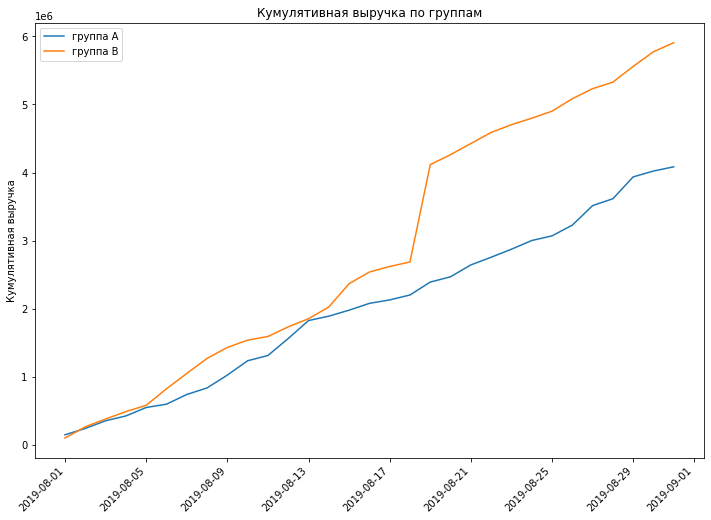

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# задаём размер сетки для графика
plt.figure(figsize=(12, 8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')

#покажем подписи на графике
plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.ylabel('Кумулятивная выручка');
#plt.xlabel('Дата');

**Вывод:** в середине теста группа B резко вырвалась вперёд и сохранила позиции до конца теста. Вероятно, причина в резком росте количества заказов или в появлении очень дорогих заказов. Выясним это далее.

##### Построим график кумулятивного среднего чека по группам

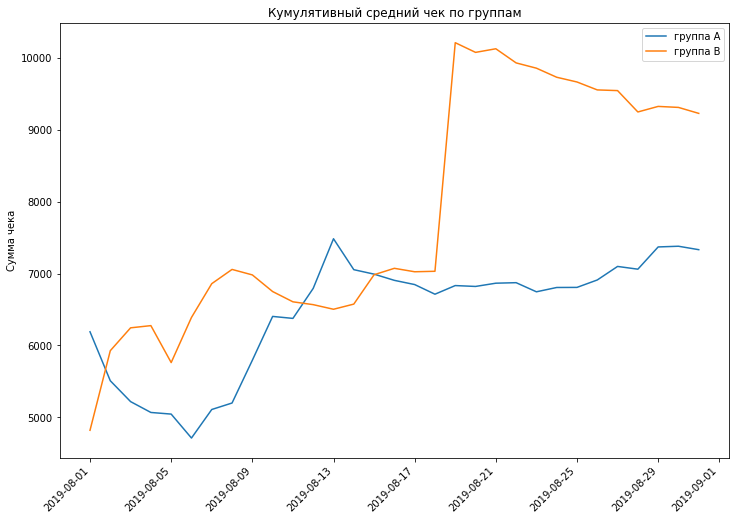

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.ylabel('Сумма чека');

**Вывод:** Видим значительные колебания графиков по обеим группам. Но в группе А в середине теста средний чек стабилизировался, а вот в группе B - заметен резкий всплек - значит в группе B действительно были дорогие заказы.

##### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

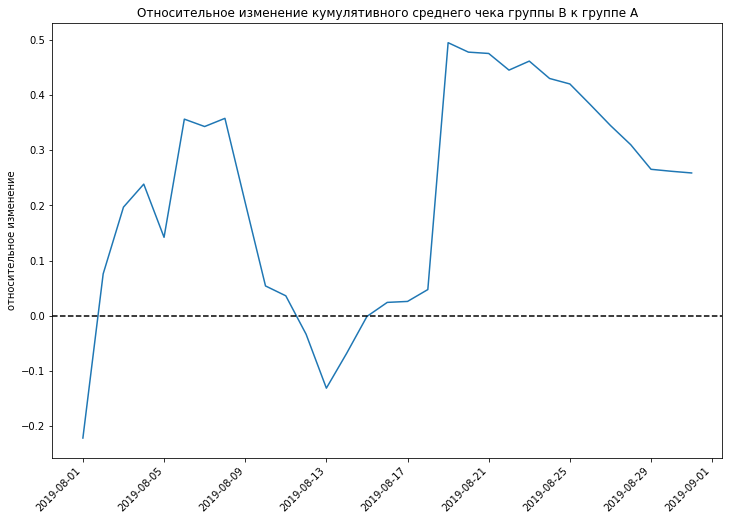

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 8))
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])
    -1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('относительное изменение');

**Вывод:** график "скачет". Наверняка есть крупные заказы и выбросы, проанализируем это далее.

##### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

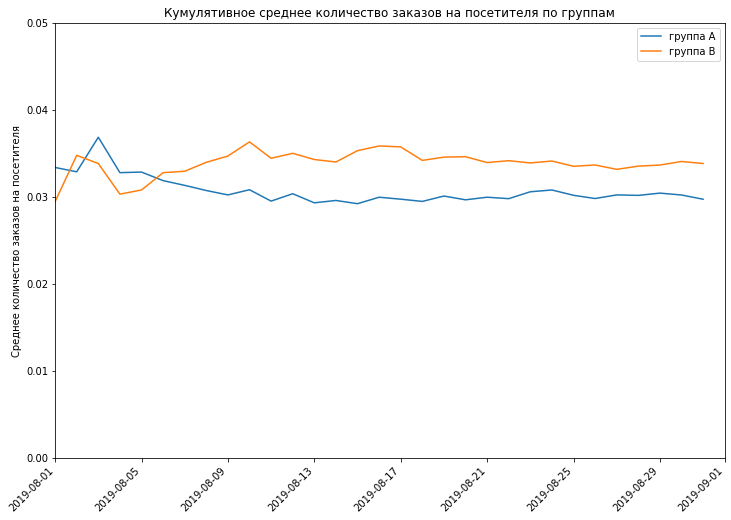

In [15]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend()
plt.ylabel('Среднее количество заказов на посетителя');

**Вывод:** изначально значения в группах колебались, но потом группа B стала лидировать. К концу теста показатели уверенно зафиксировались.

##### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

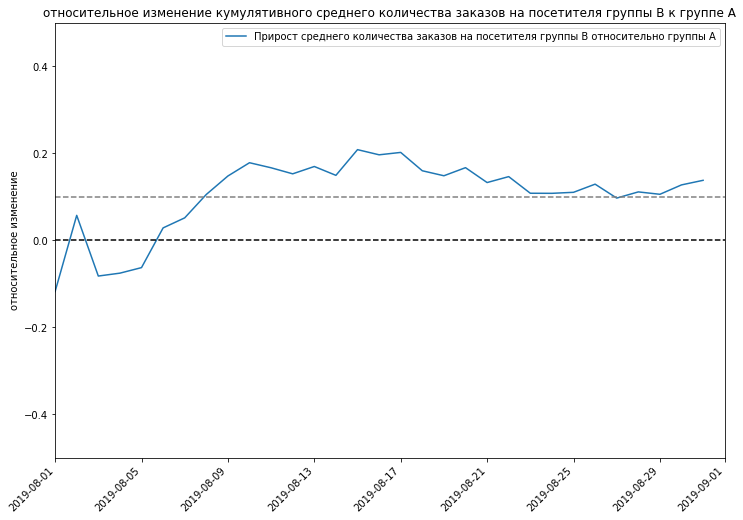

In [16]:
#строим сводную таблицу
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# строим график
plt.figure(figsize=(12, 8))
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
    label="Прирост среднего количества заказов на посетителя группы B относительно группы A"
)
plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.title('относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.legend()
plt.ylabel('относительное изменение');

**Вывод:** в начале теста группа B явно отставала, но потом вырвалась вперед. Далее показатели в B снизились, но в целом остались лучше чем в группе А, и к концу теста стабилизировались.

##### Построим точечный график количества заказов по пользователям.

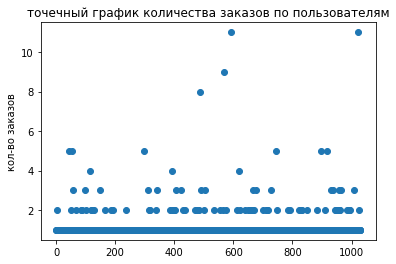

In [17]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
#plt.xticks(rotation=45, fontsize='10', horizontalalignment='right')
plt.title('точечный график количества заказов по пользователям')
plt.ylabel('кол-во заказов')
plt.xlabel(''); #подпись для оси Х

**Вывод:** пользователей, заказавших больше 2х раз - сравнительно мало. Посчитаем выборочные перцентили, чтобы оценить долю пользователей с заказами более 2-х.

##### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [18]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


**Вывод:** Не более 5% пользователей сделали больше 2х заказов, и не более 1% - больше 4х. Примем за верхнюю границу 3 заказа на пользователя, и исключим по ней аномальных пользователей.

##### Построим точечный график стоимости заказов.

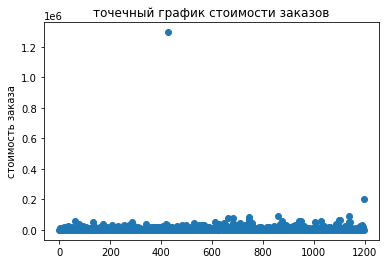

In [19]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('точечный график стоимости заказов')
plt.ylabel('стоимость заказа')
plt.xlabel(''); #подпись для оси Х

**Вывод:** Стоимость большинства заказов не превышает 100000. Есть всего лишь несколько заказов дороже, можно считать их аномальными.

Отсечём выбросы и построим более информативный график.

In [20]:
#для начала построим таблицу с сортировкой по верхним значениям
orders.sort_values(by='revenue',ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


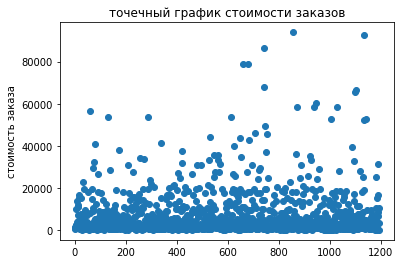

In [21]:
#действительно, видим 2 выброса. Строим график
x_values = pd.Series(range(0, len(orders.loc[(orders['revenue']<100000),'revenue'])))
plt.scatter(x_values, orders.loc[(orders['revenue']<100000),'revenue'])
plt.title('точечный график стоимости заказов')
plt.ylabel('стоимость заказа')
plt.xlabel(''); #подпись для оси Х;

**Вывод:** график изменился, видим значительный разброс значений. Однако какую стоимость заказа стоит считать в итоге аномальной? Для этого посчитаем выборочные перцентили.

##### Посчитаем 95-й, 97-й и 99-й перцентили стоимости заказов.

In [22]:
print(np.percentile(orders['revenue'], [95, 97, 99])) 

[28000.  35485.  58233.2]


**Вывод:** Не более 5% заказов стоят дороже 28000, не более 3% заказов стоят дороже 35485, и не более 1% - дороже 58233.2. Примем за верхнюю границу стоимость 50000, и исключим по ней аномальные заказы.

##### Проверим гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами A и B нет. Проверку проведём по «сырым» данным. 

Зададим для всех тестов уровень статистической значимости alpha = 0.05.

Сформулируем нулевую гипотезу:<br>
статистически значимых различий в среднем числе заказов на посетителя по "сырым" данным между группами A и B нет.<br>
Альтернативная гипотеза:<br>
в среднем числе заказов на посетителя по "сырым" данным между группами A и B значительная разница.



In [23]:
#вынесём вычисления в функцию. В дальнейшем мы проделаем одни и те же операции с "сырыми" и "чистыми" данными

#в функцию передаём только изначальные датафреймы

def my_func(orders, visitors):
    visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
    visitorsADaily.columns = ['date', 'visitorsPerDateA']

    visitorsACummulative = visitorsADaily.apply(
        lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
            {'date': 'max', 'visitorsPerDateA': 'sum'}
        ),
        axis=1,
    )
    visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

    visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
    visitorsBDaily.columns = ['date', 'visitorsPerDateB']

    visitorsBCummulative = visitorsBDaily.apply(
        lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
            {'date': 'max', 'visitorsPerDateB': 'sum'}
        ),
        axis=1,
    )
    visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

    ordersADaily = (
        orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
        .groupby('date', as_index=False)
        .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
    )
    ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

    ordersACummulative = ordersADaily.apply(
        lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
            {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
        ),
        axis=1,
    ).sort_values(by=['date'])
    ordersACummulative.columns = [
        'date',
        'ordersCummulativeA',
        'revenueCummulativeA',
    ]

    ordersBDaily = (
        orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
        .groupby('date', as_index=False)
        .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
    )
    ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

    ordersBCummulative = ordersBDaily.apply(
        lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
            {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
        ),
        axis=1,
    ).sort_values(by=['date'])
    ordersBCummulative.columns = [
        'date',
        'ordersCummulativeB',
        'revenueCummulativeB',
    ]

    data = (
        ordersADaily.merge(
            ordersBDaily, left_on='date', right_on='date', how='left'
        )
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
    )


    ordersByUsersA = (
        orders[orders['group'] == 'A']
        .groupby('visitor_id', as_index=False)
        .agg({'transaction_id': pd.Series.nunique})
    )
    ordersByUsersA.columns = ['visitor_id', 'orders']

    ordersByUsersB = (
        orders[orders['group'] == 'B']
        .groupby('visitor_id', as_index=False)
        .agg({'transaction_id': pd.Series.nunique})
    )
    ordersByUsersB.columns = ['visitor_id', 'orders'] 

    sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()-\
    len(ordersByUsersA['orders'])), name='orders')],axis=0)

    sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()-\
    len(ordersByUsersB['orders'])), name='orders')],axis=0)


    print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
    print('Прирост среднего числа заказов на посетителя группы B относительно группы A:',\
    "{0:.5f}".format(((data['ordersPerDateB']\
    .sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)*100),'%') 
    
    return ordersByUsersA, ordersByUsersB; #вернём эти датафреймы, они далее понадобятся нам для фильтрации

ordersByUsersA, ordersByUsersB = my_func(orders, visitors);


p-value: 0.01679
Прирост среднего числа заказов на посетителя группы B относительно группы A: 13.80788 %


**Вывод:** нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Разница статистически значима. Прирост составляет 13.8%.

##### Проверим гипотезу о том, что статистически значимых различий в среднем чеке заказа на посетителя между группами A и B нет. Проверку проведём по «сырым» данным. 

Сформулируем нулевую гипотезу:<br>
статистически значимых различий в среднем чеке заказа на посетителя по "сырым" данным между группами A и B нет<br>
Альтернативная гипотеза:<br>
 в среднем чеке заказа на посетителя по "сырым" данным между группами A и B значительная разница.

In [24]:
print(
    'p-value:',
    '{0:.3f}'.
    format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print(
    'Относительный прирост среднего чека заказов группы B к среднему чеку группы A:',
    '{0:.3f}'.
    format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100),'%') 

p-value: 0.729
Относительный прирост среднего чека заказов группы B к среднему чеку группы A: 25.871 %


**Вывод:** нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем. 
Несмотря на относительный прирост на 25.871%.

##### Проверим гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами A и B нет. Проверку проведём по «очищенным» данным.

Сформулируем нулевую гипотезу:<br>
статистически значимых различий в среднем чеке заказа на посетителя по "очищенным" данным между группами A и B нет<br>
Альтернативная гипотеза:<br>
в среднем чеке заказа на посетителя по "очищенным" данным между группами A и B значительная разница.

In [25]:
#для начала "очистим" данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitor_id']
#найдем аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [26]:
#передадим в функцию фильтрованный датасет orders
my_func(orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers))], visitors);


p-value: 0.01135
Прирост среднего числа заказов на посетителя группы B относительно группы A: 15.84611 %


**Вывод:** нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Разница статистически значима. Прирост составляет 15.8%


Группа B значительно лучше группы A.

##### Проверим гипотезу о том, что статистически значимых различий в среднем чеке заказа на посетителя между группами A и B нет. Проверку проведём по «очищенным» данным. 

Сформулируем нулевую гипотезу:<br>
статистически значимых различий в среднем числе заказов на посетителя по "очищенным" данным между группами A и B нет.<br>
Альтернативная гипотеза:<br>
в среднем числе заказов на посетителя по "очищенным" данным между группами A и B значительная разница.

In [27]:
print(
    'p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост среднего чека заказов группы B к среднему чеку группы A:',
    "{0:.5f}".format((
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1)*100
    )
    ,'%'
) 

p-value: 0.819
Относительный прирост среднего чека заказов группы B к среднему чеку группы A: 2.35688 %


**Вывод:** нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем.

Статистически значимых отличий между группами нет. Тем более относительный прирост после очистки от аномалий составил всего лишь 2.36%.

#### Выводы из A/B теста

По результатам проведенного тестирования следующие общие выводы:

- Есть статистически значимое различие в среднем числе заказов на посетителя(проще говоря, в конверсии). По сырым данным группа B выигрывает на 13.8%, после фильтрации аномалий - на 15.8%
- И по сырым данным, и после удаления аномалий нет статистически значимого различия по среднему чеку между группами.
- Графики по среднему чеку резко "скачут", однозначных выводов по ним сделать нельзя
- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A (график конверсии) сначала показал рост по группе B, а потом зафиксировался.

Таким образом, тест следует остановить, зафиксировав победу группы B по одной из метрик.

### Общий вывод по результатам исследования


В результате приоритизации гипотез и проведения A/B теста для их проверки следует признать преспективными следующие гипотезы:

* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 2	- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* 0	- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 6	- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Согласно результатам A/B теста внесение данных изменений поможет увеличить конверсию из посетителя в покупателя.
